In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'


In [3]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["axes.titlesize"] = 18

In [4]:
RANDOM_SEED = 666
np.random.seed(RANDOM_SEED)

In [5]:
bikes = pd.read_csv("../data/lawrence_st_bikes.csv")
bikes.head()

,name,num_bikes_available,last_reported
0,Lawrence St & Willoughby St,0,86400
1,Lawrence St & Willoughby St,0,86400
2,Lawrence St & Willoughby St,0,86400
3,Lawrence St & Willoughby St,0,86400
4,Lawrence St & Willoughby St,0,86400


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014703 entries, 0 to 1014702
Data columns (total 3 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   name                 1014703 non-null  object
 1   num_bikes_available  1014703 non-null  int64 
 2   last_reported        1014703 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 23.2+ MB


In [7]:
bikes["last_reported"] = pd.to_datetime(bikes["last_reported"], unit="s", origin="unix", utc=True).dt.tz_convert("US/Eastern")

In [8]:
bikes.head()

,name,num_bikes_available,last_reported
0,Lawrence St & Willoughby St,0,1970-01-01 19:00:00-05:00
1,Lawrence St & Willoughby St,0,1970-01-01 19:00:00-05:00
2,Lawrence St & Willoughby St,0,1970-01-01 19:00:00-05:00
3,Lawrence St & Willoughby St,0,1970-01-01 19:00:00-05:00
4,Lawrence St & Willoughby St,0,1970-01-01 19:00:00-05:00


In [9]:
bikes.tail()

,name,num_bikes_available,last_reported
1014698,Lawrence St & Willoughby St,8,2023-10-07 14:48:47-04:00
1014699,Lawrence St & Willoughby St,8,2023-10-07 14:49:50-04:00
1014700,Lawrence St & Willoughby St,8,2023-10-07 14:51:52-04:00
1014701,Lawrence St & Willoughby St,8,2023-10-07 14:53:53-04:00
1014702,Lawrence St & Willoughby St,8,2023-10-07 14:55:55-04:00


In [10]:
bikes = bikes[bikes["last_reported"] >= "1971-01-01"]

In [11]:
bikes.head()

,name,num_bikes_available,last_reported
2323,Lawrence St & Willoughby St,24,2019-12-31 18:33:09-05:00
2324,Lawrence St & Willoughby St,24,2019-12-31 18:33:09-05:00
2325,Lawrence St & Willoughby St,24,2019-12-31 18:33:09-05:00
2326,Lawrence St & Willoughby St,24,2019-12-31 18:33:09-05:00
2327,Lawrence St & Willoughby St,25,2019-12-31 19:08:17-05:00


In [12]:
bikes = bikes.set_index("last_reported").sort_index().drop(columns="name")

In [13]:
bikes.head()

,num_bikes_available
last_reported,
2019-12-31 18:33:09-05:00,24
2019-12-31 18:33:09-05:00,24
2019-12-31 18:33:09-05:00,24
2019-12-31 18:33:09-05:00,24
2019-12-31 19:08:17-05:00,25


In [14]:
bikes.index

DatetimeIndex(['2019-12-31 18:33:09-05:00', '2019-12-31 18:33:09-05:00',
               '2019-12-31 18:33:09-05:00', '2019-12-31 18:33:09-05:00',
               '2019-12-31 19:08:17-05:00', '2019-12-31 19:08:17-05:00',
               '2019-12-31 19:10:42-05:00', '2019-12-31 19:10:42-05:00',
               '2019-12-31 19:10:42-05:00', '2019-12-31 19:10:42-05:00',
               ...
               '2023-10-07 14:38:43-04:00', '2023-10-07 14:39:42-04:00',
               '2023-10-07 14:42:10-04:00', '2023-10-07 14:44:33-04:00',
               '2023-10-07 14:45:47-04:00', '2023-10-07 14:48:47-04:00',
               '2023-10-07 14:49:50-04:00', '2023-10-07 14:51:52-04:00',
               '2023-10-07 14:53:53-04:00', '2023-10-07 14:55:55-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='last_reported', length=1012380, freq=None)

<Axes: title={'center': 'Number of Bikes'}, xlabel='last_reported'>

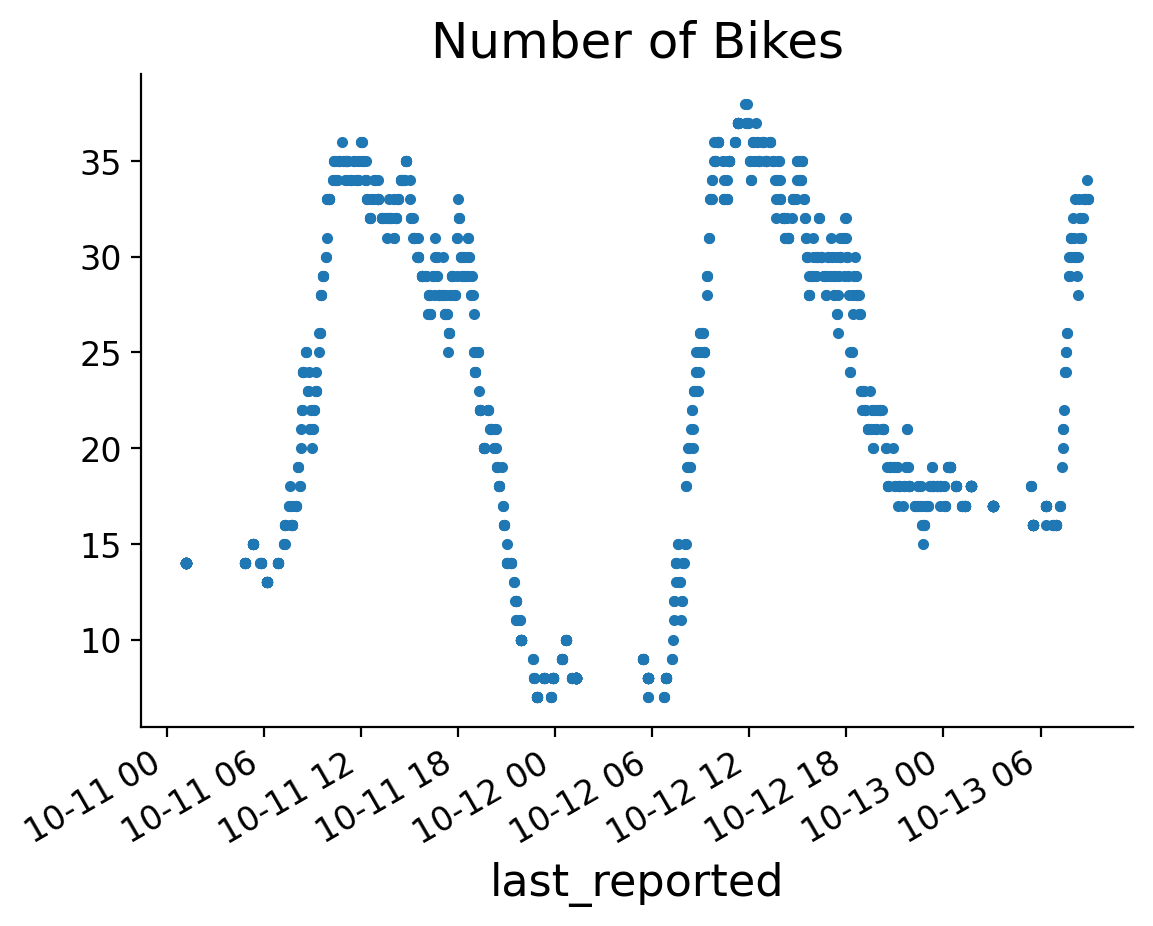

In [20]:
bikes.loc["2022-10-11":"2022-10-13 09:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")


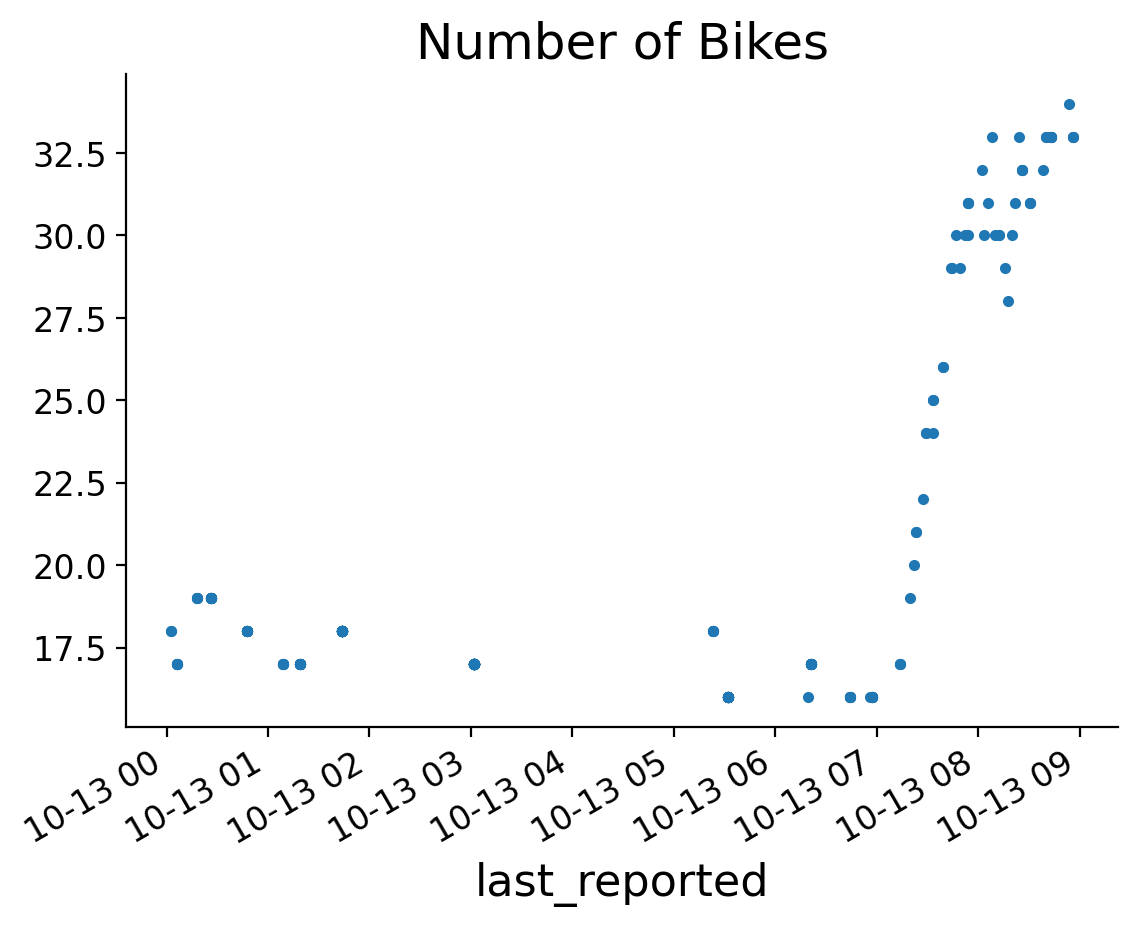

In [21]:
bikes.loc["2022-10-13":"2022-10-13 09:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")
None

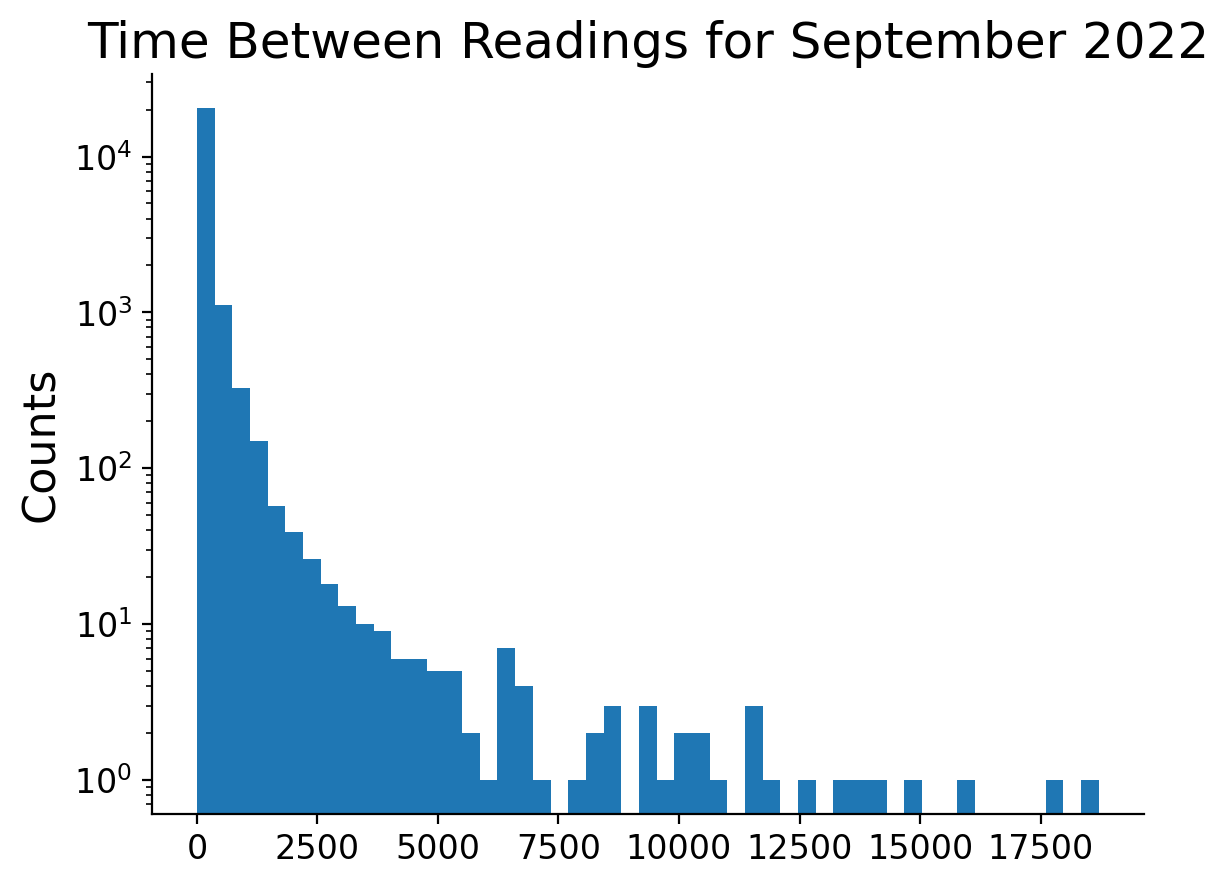

In [22]:
window = slice("2022-09-01", "2022-10-01")

fig, ax = plt.subplots()
ax.hist((bikes.loc[window].index[1:] - bikes.loc[window].index[:-1]).total_seconds(), bins=51)
ax.semilogy()
ax.set_title("Time Between Readings for September 2022")
ax.set_ylabel("Counts")
None

<Axes: title={'center': 'Number of Bikes'}, xlabel='last_reported'>

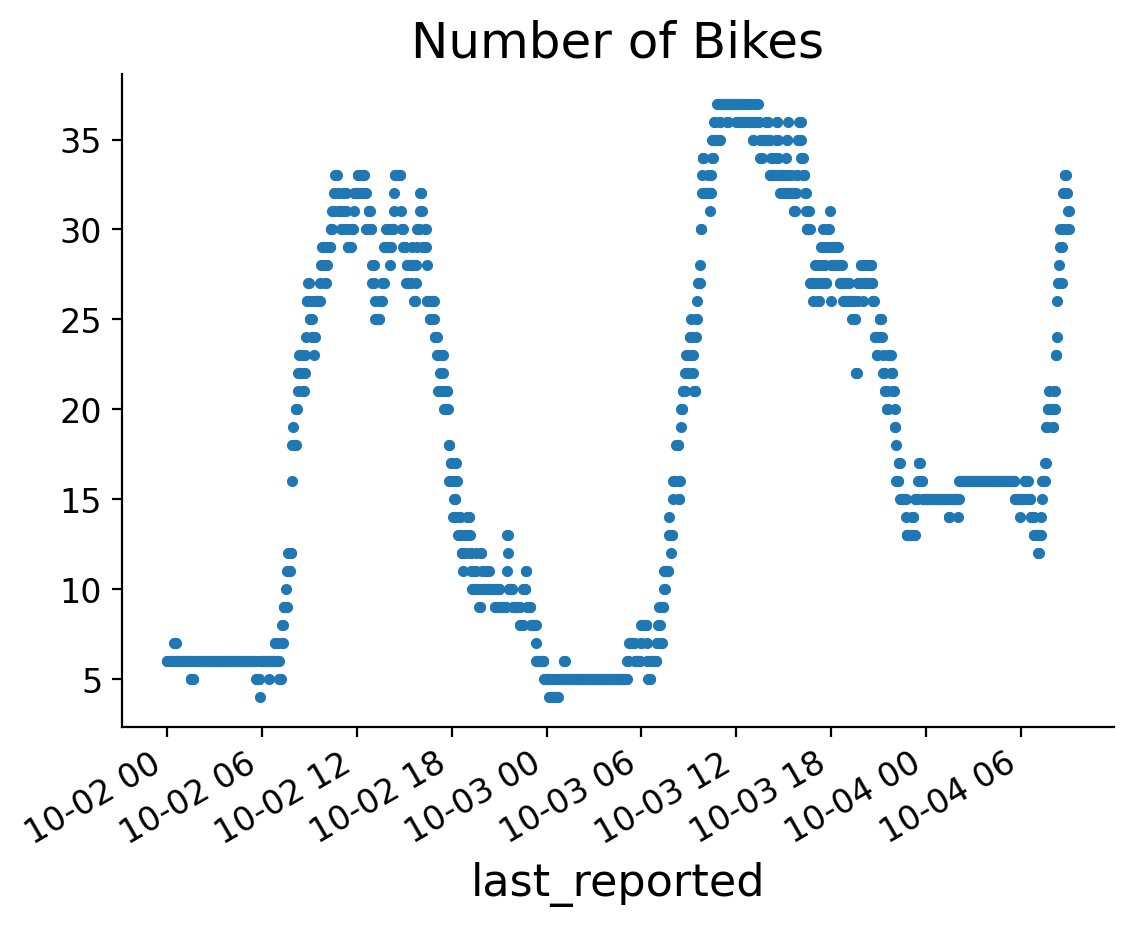

In [16]:
bikes.loc["2023-10-02":"2023-10-04 09:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")


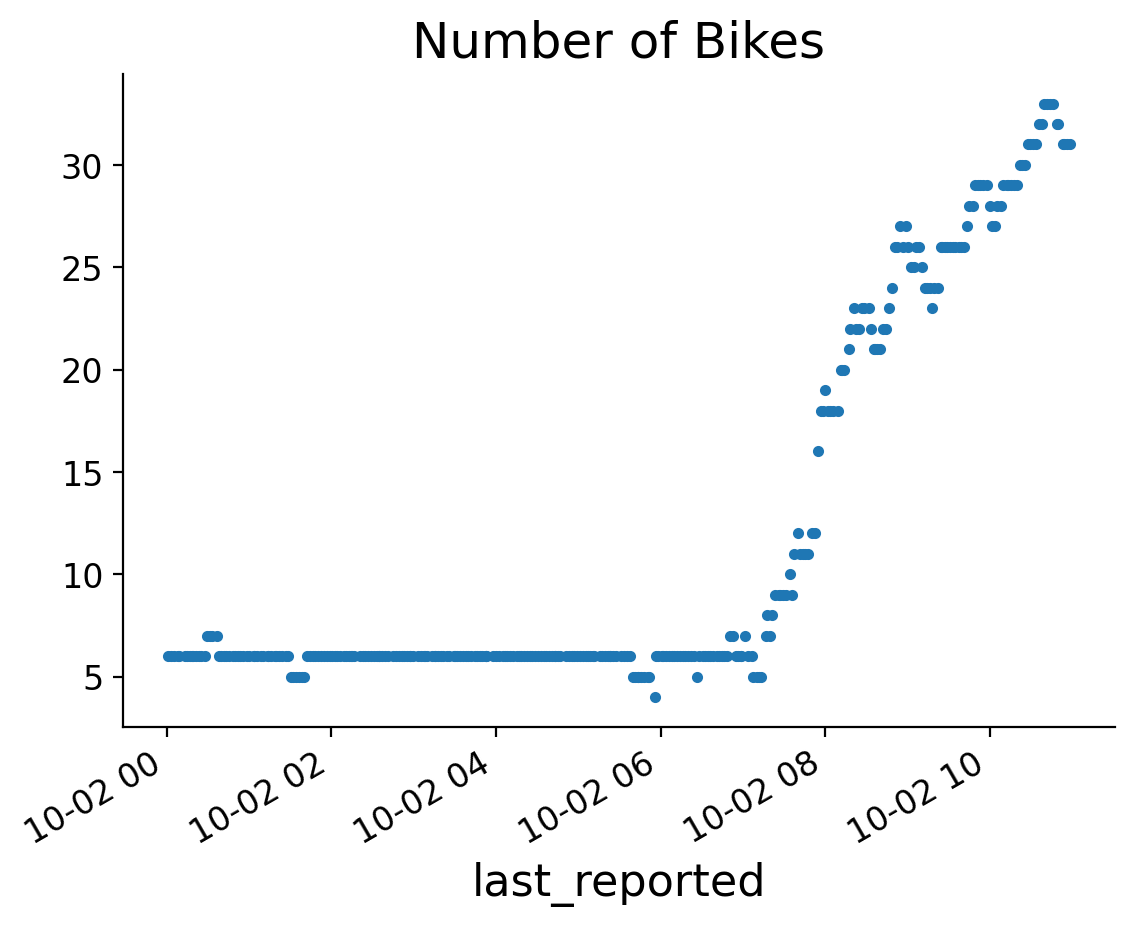

In [17]:
bikes.loc["2023-10-02":"2023-10-02 11:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")
None

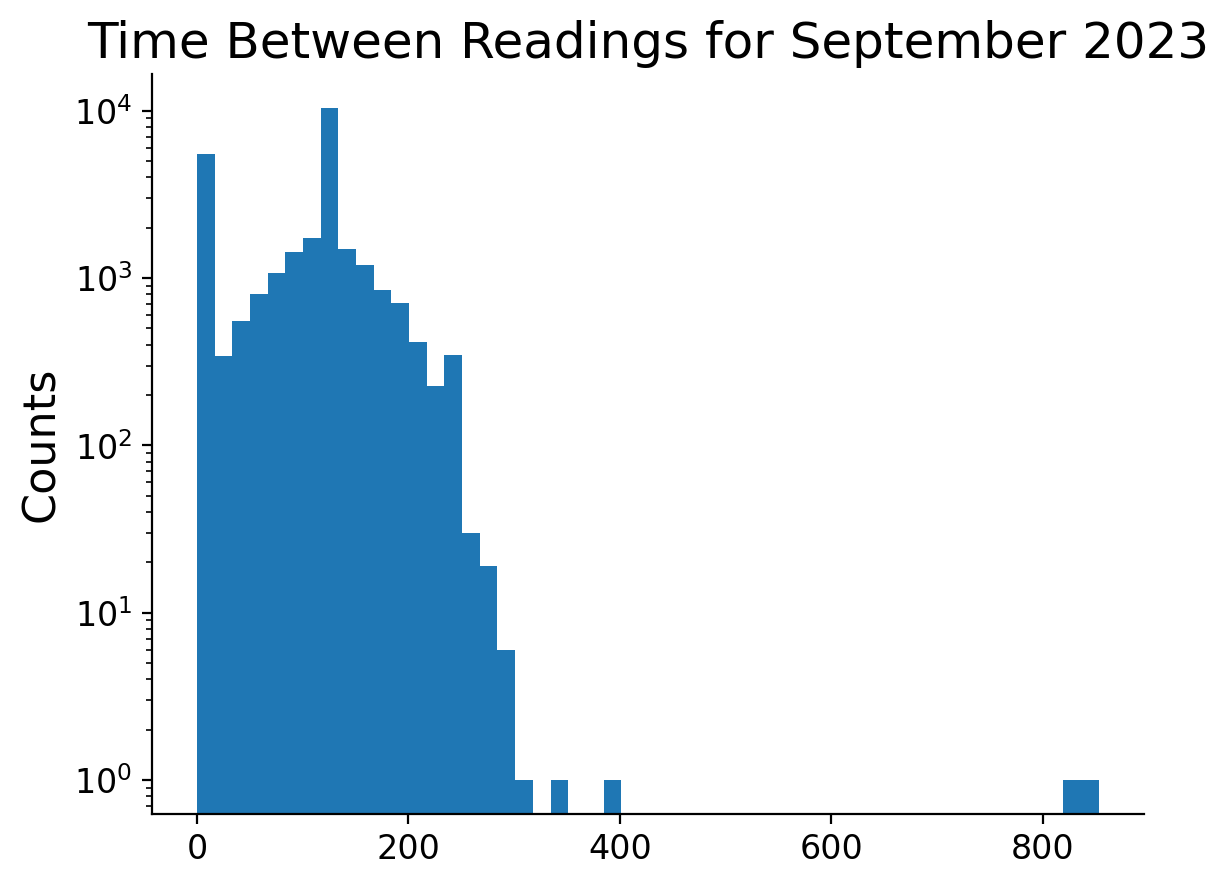

In [18]:
window = slice("2023-09-01", "2023-10-01")

fig, ax = plt.subplots()
ax.hist((bikes.loc[window].index[1:] - bikes.loc[window].index[:-1]).total_seconds(), bins=51)
ax.semilogy()
ax.set_title("Time Between Readings for September 2023")
ax.set_ylabel("Counts")
None